In [65]:
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats

%matplotlib inline

# 1 - Загрузка данных за май 2016

In [2]:
df = pd.read_csv('yellow_tripdata_2016-05.csv', parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], dayfirst=True)

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


In [4]:
#df = df.iloc[:100000, :]

In [5]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07
mean,1.529075e+00,1.662265e+00,6.110069e+00,-7.304978e+01,4.024234e+01,1.045014e+00,-7.311869e+01,4.028127e+01,1.349840e+00,1.334066e+01,3.291893e-01,4.972577e-01,1.831982e+00,3.422044e-01,2.996838e-01,1.664095e+01
std,4.991539e-01,1.304418e+00,5.155162e+03,8.212003e+00,4.523904e+00,6.203209e-01,7.902544e+00,4.353644e+00,4.942504e-01,1.188799e+01,4.585669e-01,4.473578e-02,2.665043e+00,1.760303e+00,1.300760e-02,1.450379e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.650819e+02,-4.456935e+01,1.000000e+00,-1.295732e+02,0.000000e+00,1.000000e+00,-4.100000e+02,-3.900000e+01,-2.700000e+00,-8.000000e+01,-1.500000e+01,-3.000000e-01,-4.103000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399179e+01,4.073611e+01,1.000000e+00,-7.399116e+01,4.073457e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.760000e+00
50%,2.000000e+00,1.000000e+00,1.720000e+00,-7.398136e+01,4.075375e+01,1.000000e+00,-7.397922e+01,4.075439e+01,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.260000e+00,0.000000e+00,3.000000e-01,1.230000e+01
75%,2.000000e+00,2.000000e+00,3.270000e+00,-7.396588e+01,4.076862e+01,1.000000e+00,-7.396164e+01,4.077012e+01,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.450000e+00,0.000000e+00,3.000000e-01,1.836000e+01
max,2.000000e+00,9.000000e+00,1.200000e+07,1.184089e+02,5.366724e+01,9.900000e+01,0.000000e+00,7.012994e+01,5.000000e+00,8.007000e+03,7.900000e+01,4.030000e+01,7.500000e+02,1.120680e+03,3.100000e+00,8.007800e+03


# 2 - Фильтрация

In [6]:
# Исходный размер данных
df.shape

(11836853, 19)

In [7]:
# Поездки с нулевой длительностью
df[(df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) == timedelta(0)].shape

(12268, 19)

In [8]:
# Удалим их
df = df[(df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) != timedelta(0)]

In [9]:
# Новый размер данных
df.shape

(11824585, 19)

In [10]:
# ЕСТЬ поездки с отрицательной длительностью!!!
df[(df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) < timedelta(0)].shape

(59, 19)

In [11]:
df[(df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) < timedelta(0)].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
208246,1,2016-05-01 10:20:53,2016-02-25 09:45:01,1,1.9,0.0,0.0,1,Y,-73.981514,40.779694,1,9.5,0.0,0.5,3.09,0.0,0.3,13.39
214563,1,2016-05-01 10:48:11,2016-05-01 10:47:36,2,1.5,0.0,0.0,1,N,-74.000916,40.758110,1,8.0,0.0,0.5,1.76,0.0,0.3,10.56
254305,1,2016-05-01 12:36:22,2016-05-01 12:33:58,4,2.9,0.0,0.0,1,N,-73.965134,40.803516,1,11.0,0.0,0.5,1.50,0.0,0.3,13.30
516654,1,2016-05-02 00:54:15,2016-02-25 09:45:01,1,1.9,0.0,0.0,1,Y,-73.981514,40.779694,1,9.5,0.0,0.5,3.09,0.0,0.3,13.39
1337625,1,2016-05-04 01:10:54,2016-05-04 01:08:56,1,2.8,0.0,0.0,1,N,-73.794662,40.657360,1,11.0,0.5,0.5,0.61,0.0,0.3,12.91


In [12]:
# Удалим их тоже
df = df[(df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) > timedelta(0)]
# Новый размер данных
df.shape

(11824526, 19)

In [13]:
# Дальше будем сразу удалять вместе с нулями и нереальные отрицательные значения

In [14]:
# фильтруем по пассажирам
print(df[df['passenger_count'] <= 0].shape)
df = df[df['passenger_count'] > 0]
print(df.shape)

(522, 19)
(11824004, 19)


In [15]:
# фильтруем по расстоянию
print(df[df['trip_distance'] <= 0].shape)
df = df[df['trip_distance'] > 0]
print(df.shape)

(60638, 19)
(11763366, 19)


In [16]:
# фильтруем по координатам (начало не в Нью-Йорке)
city_coords = {
    'longitude': [-74.25559, -73.70001], 
    'latitude': [40.49612, 40.91553]
}

def in_city(longitude, latitude):
    return (
        (city_coords['longitude'][0] <= longitude) &
        (longitude <= city_coords['longitude'][1]) &
        (city_coords['latitude'][0] <= latitude) &
        (latitude <= city_coords['latitude'][1])
    )

def in_region(longitude, latitude, region_longitudes, region_latitudes):
    return (
        (region_longitudes[0] <= longitude) &
        (longitude <= region_longitudes[1]) &
        (region_latitudes[0] <= latitude) &
        (latitude <= region_latitudes[1])
    )

In [17]:
# Начало не в Нью-Йорке
df[np.logical_not(in_city(df['pickup_longitude'], df['pickup_latitude']))].shape

(136845, 19)

In [18]:
df[np.logical_not(in_region(df['pickup_longitude'], df['pickup_latitude'], city_coords['longitude'], city_coords['latitude']))].shape

(136845, 19)

In [19]:
%%time
# Оставим только поездки с началом в Нью-Йорке
df = df[in_city(df['pickup_longitude'], df['pickup_latitude'])]
df.shape

(11626521, 19)

# 3 - Агрегация

In [20]:
regions = pd.read_csv('regions.csv', delimiter=';')
regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [21]:
regions.shape

(2500, 5)

In [22]:
# добавляем колонку с данными ондексе региона (по файлу из приложения)
%%time
df['region'] = 0
for region in regions.iterrows():
    region_longitudes = [region[1].west, region[1].east]
    region_latitudes = [region[1].south, region[1].north]
    df.loc[in_region(
        df['pickup_longitude'],
        df['pickup_latitude'], 
        region_longitudes, 
        region_latitudes,
    ), 'region'] = int(region[1].region)

Wall time: 26min 25s


In [24]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,region
0,1,2016-05-01,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,1233
1,2,2016-05-01,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,1180
2,2,2016-05-01,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,1180
3,2,2016-05-01,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,1173
4,2,2016-05-01,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,1130


In [25]:
#df.to_csv('yellow_tripdata_2016-05(regions).csv')

In [26]:
# добаляем колонку с часом начала поездки
df['pickup_hour'] = df['tpep_pickup_datetime'].apply(lambda x: x.hour)

In [28]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,region,pickup_hour
11836837,2,2016-05-31 23:53:01,2016-06-01 00:00:24,2,1.89,-73.947876,40.774818,1,N,-73.974274,...,1,8.0,0.5,0.5,1.86,0.0,0.3,11.16,1384,23
11836838,2,2016-05-31 23:53:02,2016-06-01 00:19:36,1,15.21,-73.789467,40.646942,1,N,-73.893929,...,1,42.0,0.5,0.5,8.66,0.0,0.3,51.96,2068,23
11836839,2,2016-05-31 23:53:02,2016-05-31 23:59:07,1,1.80,-74.008659,40.719723,1,N,-73.999580,...,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,1127,23
11836840,2,2016-05-31 23:53:03,2016-06-01 00:05:47,1,2.28,-73.981644,40.758862,1,N,-73.952637,...,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76,1232,23
11836841,1,2016-05-19 03:29:16,2016-05-19 03:31:24,1,0.60,-73.948959,40.586658,1,Y,-73.948570,...,2,4.0,0.5,0.5,0.00,0.0,0.3,5.30,1361,3


In [39]:
df_agregated = df.groupby('region')['pickup_hour'].value_counts()

In [51]:
df_agregated[df_agregated.index[0]]

1

In [57]:
data = []
for region in range(1, 50*50 + 1):
    for hour in range(25):
        if (region, hour) in df_agregated.index:
            data.append([region, hour, df_agregated[region, hour]])
        else:
            data.append([region, hour, 0])

In [60]:
data_df = pd.DataFrame(data, columns=['region', 'hour', 'count'])

# 4 - первые 20 строк итоговой таблицы

In [61]:
data_df.head(20)

,region,hour,count
0,1,0,0
1,1,1,0
2,1,2,0
3,1,3,0
4,1,4,0
5,1,5,0
6,1,6,0
7,1,7,0
8,1,8,0
9,1,9,0


# 5 - график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.

In [63]:
building_coords = {'latitude': 40.748817, 'longitude': -73.985428}
building_region = [1231, -73.9889116, -73.9778, 40.747766, 40.7561542]

<BarContainer object of 25 artists>

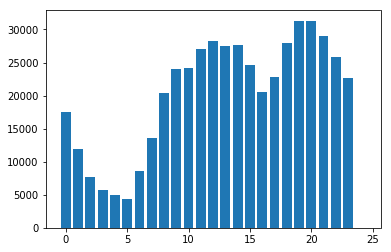

In [69]:
building_data = data_df[data_df['region'] == building_region[0]]
plt.bar(building_data['hour'], building_data['count'], )

# 6 - количество пар час-ячейка, для которых не было совершено ни одной поездки.

In [72]:
print(data_df[data_df['count'] == 0].shape[0])

49689
